## Семинар 1 "Полносвязные нейронные сети"

ФИО: Крылов Иван Николаевич

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети, и изучили три слоя: линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице, backward, которая будет вычислять градиенты, и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Часть 1: Линейный слой


In [8]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimension of inputs is *input_size*, of output: *output_size*.
        '''
        #### Create weights, initialize them with samples from N(0, 0.1).
        # We have `output_size` neurons, each consumes the same `input_size` inputs.
        # One more column of 1s will be added to account for the bias.
        # Therefore, we need `input_size+1`x`output_size` weights.
        self.w = np.random.normal(0,0.1, (input_size+1, output_size))
        self.b = np.zeros(output_size)
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### Apply layer to input
        # Column of 1s accounts for bias
        self.X = np.append(X, np.ones((X.shape[0],1)), axis=1)
        # (number_of_objects, input_size) * (input_size, output_size) -> (number_of_objects, output_size)
        self.y = np.dot(self.X, self.w)
        return self.y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        # given:
        # X: matrix of shape (number_of_objects, input_size)
        # y: matrix of shape (number_of_objects, output_size)
        # w: matrix of shape (input_size, output_size)
        # dLdy: matrix of shape (number_of_objects, output_size) (scalar by matrix)
        # y := X * w

        # dLdw: matrix of shape (input_size, output_size)
        self.dLdw = np.dot(self.X.T, dLdy)
        # dLdx: matrix of shape (number_of_objects, input_size)
        self.dLdx = np.dot(dLdy, self.w.T)
        
        # oh, and that last "x" was an 1 I'd added to account for the bias -- keep quiet about it
        return self.dLdx[:,0:(self.X.shape[1]-1)]
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        self.w = self.w - learning_rate*self.dLdw

### Часть 2: Сигмоида

In [14]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### Apply layer to input
        self.X = X #.sum(axis=1) # turns out, I don't need to sum...?
        self.y = 1/(1+np.exp(-self.X))
        return self.y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        # dL/dx = dL/dy * dy/dx
        print dLdy.shape
        self.dLdx = dLdy * np.exp(-self.X)/(np.exp(-self.X) + 1)**2
        return self.dLdx
    
    def step(self, learning_rate):
        # no weights to optimize here, move along
        pass

### Часть 3: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://hips.seas.harvard.edu/blog/2013/01/09/computing-log-sum-exp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

$$ {\mathrm L} \equiv \sum_c {\mathrm I} [c=t] \log  p_c $$
$$ p_c \equiv \frac{e^{y_c}}{\sum_k e^{y_k}} $$
$$ {\mathrm L} = y_t - \log \sum_k e^{y_k} $$
$$ \frac{\partial L}{\partial y_c} =   \begin{cases}
    1 - \frac{e^{y_c}}{\sum_k e^{y_k}}, & k=t \\
    - \frac{e^{y_c}}{\sum_k e^{y_k}}, & \text{otherwise }
  \end{cases} $$ 
$$ \frac{e^{y_c}}{\sum_k e^{y_k}} = \exp \left( y_c - \log \sum_k e^{y_k} \right) 
= \exp \left( y_c - \max_k y_k - \log \sum_k \left( y_k - \max_k y_k \right) \right)
$$

In [19]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        y is np.array of size (N), contains correct labels
        '''
        #### Apply layer to input
        self.X = X
        Xmax = np.max(X,axis=1) # keep axis 0 (different points) intact
        self.L = X[range(X.shape[0]),y] - Xmax - np.log( # trigger NumPy's "smart indexing" by feeding both array-like
            np.sum( # log-sum-exp to avoid floating overflows
                np.exp(
                    (X.T-Xmax).T # hooray for NumPy broadcasting
                ),
                axis=1
            )
        )
        self.L = -self.L # *negative* LL
        return self.L
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        # same as above: tricks to adhere to broadcasting and smart indexing rules; also, log-sum-exp
        local_max = np.max(self.X,axis=1)
        self.dLdx = -np.exp(
            self.X.T - local_max - np.log(
                np.sum(
                    np.exp(self.X.T-local_max),
                    axis=0
                )
            )
        ).T
        self.dLdx[range(X.shape[0]),y] += 1
        self.dLdx = -self.dLdx # *negative*
        print self.dLdx.shape
        return self.dLdx

### Часть 4, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [20]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        self.layers = modules
        pass
    
    def forward(self, X):
        #### Apply layers to input
        y = X
        for layer in self.layers:
            y = layer.forward(y)
        return y
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        dLdx = dLdy
        for i in reversed(xrange(len(self.layers))):
            dLdx = self.layers[i].backward(dLdx)
        
        return dLdx
    
    def step(self, learning_rate):
        for layer in self.layers:
            layer.step(learning_rate)

### Часть 5, обучение на простых данных

(346, 2)


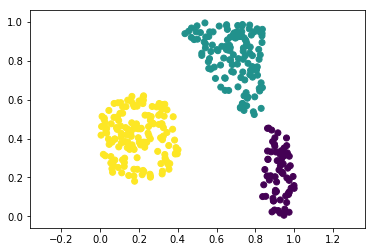

In [21]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
print X.shape
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.01). 
2. Нарисуйте график сходимости (изменение NLL со временем).
3. Нарисуйте разделяющую поверхность

Отличная визуализация: http://playground.tensorflow.org/

In [22]:
%%time
learning_rate = .01
iterations = 1
loss = np.empty((iterations,X.shape[0]))

NN = NeuralNetwork((Linear(2,10),Sigmoid(),Linear(10,10),Sigmoid(),Linear(10,3)))
nll = NLLLoss()

for i in xrange(iterations):
    loss[i] = nll.forward(NN.forward(X),y)
    NN.backward(nll.backward())
    NN.step(learning_rate)

(346, 3)
(346, 10)
(346, 10)
CPU times: user 3.36 ms, sys: 1.81 ms, total: 5.18 ms
Wall time: 3.52 ms


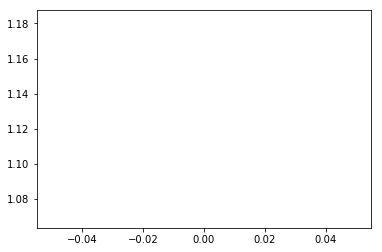

In [23]:
plt.plot(range(iterations),loss.mean(axis=1))

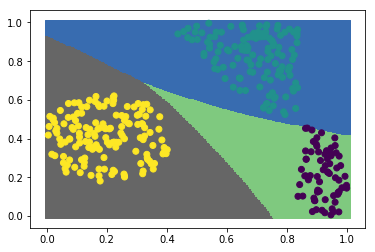

In [88]:
points = 200
xx = np.linspace(min(X[:,0]),max(X[:,0]),points)
yy = np.linspace(min(X[:,1]),max(X[:,1]),points)
xx, yy = np.meshgrid(xx,yy)
Xgrid=np.array((xx.ravel(), yy.ravel())).T
plt.scatter(xx,yy,c=NN.forward(Xgrid).argmax(axis=1),marker=",",cmap="Accent")
plt.scatter(X[:,0],X[:,1],c=y)

Gradient RMSE = 5.46227318202e-11


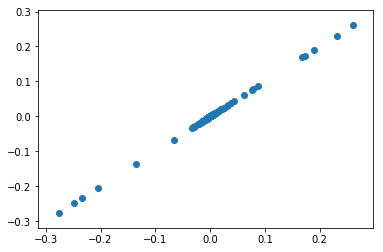

In [123]:
# the only gradient we can check is NLL loss function by a single input weight
weights = NN.forward(X) # let's get a reasonable weight value

my_epsilon = np.zeros(weights.shape[1])
# these are changeable
idx = 0
my_epsilon[idx] = 1e-6

nll.forward(weights,y) # compute L...
grad_my = nll.backward()[:,idx] # ...and dL/dx

# then estimate it numerically from L
grad_est = (nll.forward(weights+my_epsilon,y)-nll.forward(weights-my_epsilon,y))/(2*my_epsilon[idx])
plt.scatter(grad_my,grad_est)
print "Gradient RMSE =", np.sqrt(np.mean(((grad_my-grad_est)**2)))